# Customer analysis in marketing campaigns

In this exercise, you work for a consulting firm as data scientist. In this scenario, your client is the marketing team of a grocery store. They would like to find which are the ideal customers according to the results of the last marketing campaigns. Your analysis will be helpful to adapt and modify products according to the different needs and behavior of their customers.

You dispose of a dataset from the mall dataset with several features:


People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if customer complained in the last 2 years, 0 otherwise

Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

- NumWebPurchases: Number of purchases made through the company’s web site
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s web site in the last month

'Z_CostContact' and 'Z_Revenue' contains constant value across all the observations and therefore they will not contribute anything in the analysis.

You have two days to do this study

In [449]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')

In [483]:
campaign_df = pd.read_csv('C:/Users/Simplon/Desktop/marketing/marketing_campaign.csv', sep="\t")
campaign_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [451]:
 campaign_df.Dt_Customer.min()

'01-01-2013'

In [452]:
 campaign_df.Dt_Customer.max()

'31-12-2013'

In [296]:
campaign_df.shape

(2240, 29)

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Year_Birth'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Kidhome'}>,
        <AxesSubplot:title={'center':'Teenhome'}>],
       [<AxesSubplot:title={'center':'Recency'}>,
        <AxesSubplot:title={'center':'MntWines'}>,
        <AxesSubplot:title={'center':'MntFruits'}>,
        <AxesSubplot:title={'center':'MntMeatProducts'}>,
        <AxesSubplot:title={'center':'MntFishProducts'}>],
       [<AxesSubplot:title={'center':'MntSweetProducts'}>,
        <AxesSubplot:title={'center':'MntGoldProds'}>,
        <AxesSubplot:title={'center':'NumDealsPurchases'}>,
        <AxesSubplot:title={'center':'NumWebPurchases'}>,
        <AxesSubplot:title={'center':'NumCatalogPurchases'}>],
       [<AxesSubplot:title={'center':'NumStorePurchases'}>,
        <AxesSubplot:title={'center':'NumWebVisitsMonth'}>,
        <AxesSubplot:title={'center':'AcceptedCmp3'}>,
        <Ax

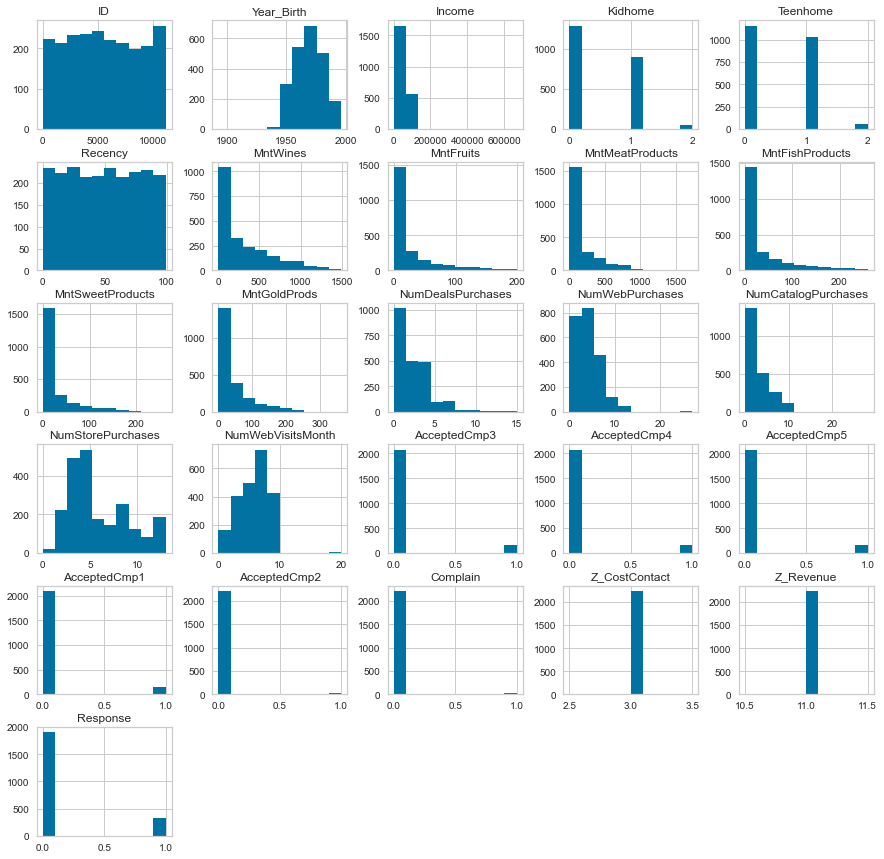

In [297]:
campaign_df.hist(figsize=(15,15))

In [5]:
campaign_df.Income.value_counts()

7500.0     12
35860.0     4
18929.0     3
34176.0     3
67445.0     3
           ..
83033.0     1
29999.0     1
65819.0     1
54132.0     1
62335.0     1
Name: Income, Length: 1974, dtype: int64

In [484]:
campaign_df.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [7]:
campaign_df.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [8]:
campaign_df.Complain.value_counts()

0    2219
1      21
Name: Complain, dtype: int64

In [9]:
campaign_df.AcceptedCmp1.value_counts()

0    2096
1     144
Name: AcceptedCmp1, dtype: int64

In [10]:
campaign_df.AcceptedCmp2.value_counts()


0    2210
1      30
Name: AcceptedCmp2, dtype: int64

In [11]:
campaign_df.AcceptedCmp3.value_counts()

0    2077
1     163
Name: AcceptedCmp3, dtype: int64

In [12]:
campaign_df.AcceptedCmp5.value_counts()

0    2077
1     163
Name: AcceptedCmp5, dtype: int64

# EDA

In [448]:
campaign_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2101 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2101 non-null   object 
 1   Marital_Status       2101 non-null   object 
 2   Income               2101 non-null   float64
 3   Kidhome              2101 non-null   int64  
 4   Teenhome             2101 non-null   int64  
 5   Recency              2101 non-null   int64  
 6   MntWines             2101 non-null   int64  
 7   MntFruits            2101 non-null   int64  
 8   MntMeatProducts      2101 non-null   int64  
 9   MntFishProducts      2101 non-null   int64  
 10  MntSweetProducts     2101 non-null   int64  
 11  MntGoldProds         2101 non-null   int64  
 12  NumDealsPurchases    2101 non-null   int64  
 13  NumWebPurchases      2101 non-null   int64  
 14  NumCatalogPurchases  2101 non-null   int64  
 15  NumStorePurchases    2101 non-null   i

In [368]:
campaign_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [471]:
campaign_df.duplicated(keep='last').count()

2240

In [68]:
campaign_df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [17]:
campaign_df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [18]:
#sns.pairplot(campaign_df)

#pd.plotting.scatter_matrix(campaign_df)
#norm=normalize(df_scl)

In [19]:
#campaign_df.isnull().sum()

In [485]:
# drop columns Z_CostContact & Z_Revenue
campaign_df.drop(['ID','Z_CostContact', 'Z_Revenue','Complain','AcceptedCmp2'], axis=1, inplace=True)
#pd.plotting.scatter_matrix(campaign_df,figsize=(50,50))
campaign_df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,3,8,10,4,7,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,2,1,1,2,5,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,1,8,2,10,4,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,2,2,0,4,6,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,5,3,6,5,0,0,0,0,0


In [486]:
# Marital_Status
# drop some values (2 YOLO / 2 ABSURD / 3 ALONE)
values = ['YOLO', 'Absurd']
campaign_df =campaign_df[campaign_df.Marital_Status.isin(values) == False]

# replace statut ALONE by SINGLE
campaign_df = campaign_df.replace(['Alone'],'Single')

In [487]:
#Outliers income
maxtresh = campaign_df['Income'].quantile(0.95)
maxtresh

84140.4

In [488]:
campaign_df = campaign_df[campaign_df["Income"] < maxtresh]


In [489]:
campaign_df['Dt_Customer'] = campaign_df['Dt_Customer'].apply(pd.to_datetime)
campaign_df.Dt_Customer.min()

Timestamp('2012-01-08 00:00:00')

In [490]:
campaign_df['Year_Birth'] = campaign_df['Year_Birth'].apply(pd.to_datetime)
date_max= campaign_df['Dt_Customer'].max()
date_max

Timestamp('2014-12-06 00:00:00')

In [491]:
# convert Year Birth in column Age
campaign_df['Year_Birth'] = campaign_df['Year_Birth'].dt.year
campaign_df['Age'] = 2014 - campaign_df['Year_Birth']


In [492]:
campaign_df['Age'] = 2014 - campaign_df['Year_Birth']
campaign_df.drop('Year_Birth', axis=1, inplace=True)

In [459]:
campaign_df['Age'].head()

0    44
1    44
2    44
3    44
4    44
Name: Age, dtype: int64

In [493]:
campaign_df.drop('Dt_Customer', axis=1,inplace=True)
campaign_df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Response,Age
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,8,10,4,7,0,0,0,0,1,44
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,1,1,2,5,0,0,0,0,0,44
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,8,2,10,4,0,0,0,0,0,44
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,2,0,4,6,0,0,0,0,0,44
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,5,3,6,5,0,0,0,0,0,44


In [494]:
#outliers
Q1 = campaign_df.quantile(0.25)
Q3 = campaign_df.quantile(0.75)
IQR = Q3 - Q1
((campaign_df[campaign_df.columns ]< (Q1 - 1.5 * IQR)) | (campaign_df[campaign_df.columns] > (Q3 + 1.5 * IQR))).sum()

AcceptedCmp1           101
AcceptedCmp3           153
AcceptedCmp4           132
AcceptedCmp5            99
Age                      0
Education                0
Income                   0
Kidhome                  0
Marital_Status           0
MntFishProducts        227
MntFruits              226
MntGoldProds           200
MntMeatProducts        170
MntSweetProducts       235
MntWines                44
NumCatalogPurchases     15
NumDealsPurchases       82
NumStorePurchases        0
NumWebPurchases          2
NumWebVisitsMonth        9
Recency                  0
Response               279
Teenhome                 0
dtype: int64

In [462]:
campaign_df.Teenhome.value_counts()

0    1158
1    1030
2      52
Name: Teenhome, dtype: int64

In [495]:
X=campaign_df.drop(["Education","Marital_Status","AcceptedCmp1","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"],axis=1)
X.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,44
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,44
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,44
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,44
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,44


In [396]:
scaled_features = campaign_df.copy()
col_names = X.columns
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features

In [499]:
from sklearn.preprocessing import MinMaxScaler
minmax_features = campaign_df.copy()
col_names = X.columns
features = minmax_features[col_names]
scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)
minmax_features[col_names] = features
minmax_features.head()
#campaign_df.info()
minmax_features = pd.get_dummies(minmax_features , columns=['Education', 'Marital_Status'],drop_first=True )
minmax_features.head()
df_minmax=minmax_features

In [398]:
scaled_features[col_names] = features
scaled_features

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Response,Age
0,Graduation,Single,0.434464,-0.855573,-0.964915,0.311701,1.091033,1.672706,2.031175,2.579994,...,1.467758,2.801509,-0.529412,0.647011,0,0,0,0,1,0.0
1,Graduation,Single,-0.175744,0.993767,0.873060,-0.381811,-0.851719,-0.616896,-0.715588,-0.626583,...,-1.114337,-0.543848,-1.150458,-0.204725,0,0,0,0,0,0.0
2,Graduation,Together,1.131645,-0.855573,-0.964915,-0.797918,0.440336,0.646333,-0.100110,1.429399,...,1.467758,-0.172142,1.333727,-0.630593,0,0,0,0,0,0.0
3,Graduation,Together,-1.194895,0.993767,-0.964915,-0.797918,-0.851719,-0.537945,-0.644376,-0.475685,...,-0.745467,-0.915555,-0.529412,0.221143,0,0,0,0,0,0.0
4,PhD,Married,0.442483,0.993767,-0.964915,1.560022,-0.347351,0.488429,-0.145889,0.203355,...,0.361146,0.199564,0.091635,-0.204725,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,0.594078,-0.855573,0.873060,-0.104406,1.321423,0.488429,0.179653,0.127906,...,1.836629,0.199564,-0.529412,-0.204725,0,0,0,0,0,0.0
2236,PhD,Together,0.738481,2.843107,0.873060,0.242350,0.378068,-0.643214,-0.593510,-0.664307,...,1.467758,-0.172142,-0.218889,0.647011,0,0,0,1,0,0.0
2237,Graduation,Divorced,0.374602,-0.855573,-0.964915,1.455996,1.940987,0.620015,0.357684,-0.060716,...,-0.745467,0.199564,2.265297,0.221143,0,1,0,0,0,0.0
2238,Master,Together,1.009127,-0.855573,0.873060,-1.422079,0.446562,0.146304,0.342424,0.844670,...,0.730016,0.942977,1.333727,-1.056461,0,0,0,0,0,0.0


In [399]:
#campaign_df.info()
scaled_features = pd.get_dummies(scaled_features , columns=['Education', 'Marital_Status'],drop_first=True )
scaled_features.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Response,Age,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,0.434464,-0.855573,-0.964915,0.311701,1.091033,1.672706,2.031175,2.579994,1.644163,0.883030,...,1,0.0,0,1,0,0,0,1,0,0
1,-0.175744,0.993767,0.873060,-0.381811,-0.851719,-0.616896,-0.715588,-0.626583,-0.617242,-0.720365,...,0,0.0,0,1,0,0,0,1,0,0
2,1.131645,-0.855573,-0.964915,-0.797918,0.440336,0.646333,-0.100110,1.429399,-0.097378,-0.016436,...,0,0.0,0,1,0,0,0,0,1,0
3,-1.194895,0.993767,-0.964915,-0.797918,-0.851719,-0.537945,-0.644376,-0.475685,-0.565255,-0.739919,...,0,0.0,0,1,0,0,0,0,1,0
4,0.442483,0.993767,-0.964915,1.560022,-0.347351,0.488429,-0.145889,0.203355,0.058580,-0.544383,...,0,0.0,0,0,0,1,1,0,0,0


In [468]:
norm=normalize(scaled_features)
df_norm=pd.DataFrame(norm)

# Customer Segmentation

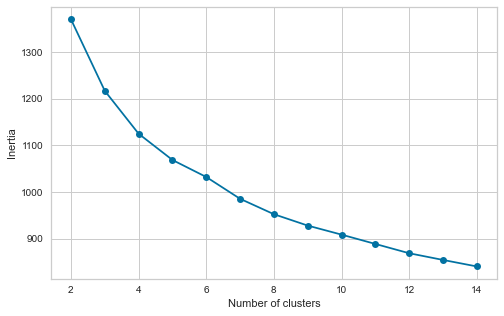

In [401]:
scores = []
for k in range(2,15):
    km = KMeans(n_clusters=k,random_state=123)
    km = km.fit(df_norm)
    scores.append(km.inertia_)
dfk = pd.DataFrame({'Cluster':range(2,15), 'Score':scores})
plt.figure(figsize=(8,5))
plt.plot(dfk['Cluster'], dfk['Score'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# df_minmax

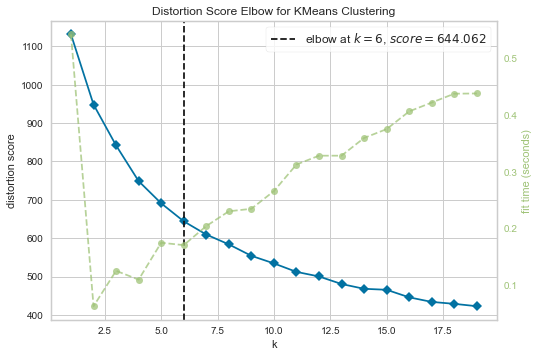

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [500]:
norm=normalize(df_minmax)
df_norm=pd.DataFrame(norm)
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))
visualizer.fit(df_norm)      
visualizer.show()

In [434]:
for i in range(2,8):
    kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(df_norm)
    print("Silhouette score for {} clusters k-means : {} ".format(i,metrics.silhouette_score(df_norm,kmeans_labels, metric='euclidean').round(3)))

Silhouette score for 2 clusters k-means : 0.15 
Silhouette score for 3 clusters k-means : 0.182 
Silhouette score for 4 clusters k-means : 0.168 
Silhouette score for 5 clusters k-means : 0.184 
Silhouette score for 6 clusters k-means : 0.171 
Silhouette score for 7 clusters k-means : 0.174 


In [510]:
model3 = KMeans(n_clusters=3,init='k-means++').fit(df_norm)
ypred3=model3.labels_
# ou ypred= model.predict(kmeans)df_norm
silhouette_score(df_norm,ypred3)
df_minmax.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Response,Age,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,0.684671,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,0.444444,0.274143,...,1,0.0,0,1,0,0,0,1,0,0
1,0.541517,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,0.005051,0.018692,...,0,0.0,0,1,0,0,0,1,0,0
2,0.848228,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,0.106061,0.130841,...,0,0.0,0,1,0,0,0,0,1,0
3,0.302426,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,0.015152,0.015576,...,0,0.0,0,1,0,0,0,0,1,0
4,0.686552,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,0.136364,0.046729,...,0,0.0,0,0,0,1,1,0,0,0


In [447]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [515]:
pip install cufflinks

  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68724 sha256=19288b3596ea03b4d4737ddb2f2d78fab6106a9f43a250fb96e5c89ed86ae143
  Stored in directory: c:\users\simplon\appdata\local\pip\cache\wheels\6b\76\62\6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
Successfully built cufflinks
Note: you may need to restart the kernel to use updated packages.


In [516]:
import plotly.express as px
import plotly.graph_objs as go
fig = px.scatter_3d(campaign_df, x="Marital_Status", y="Recency", z="MntWines", color =ypred3)

fig.show()

# df scaled

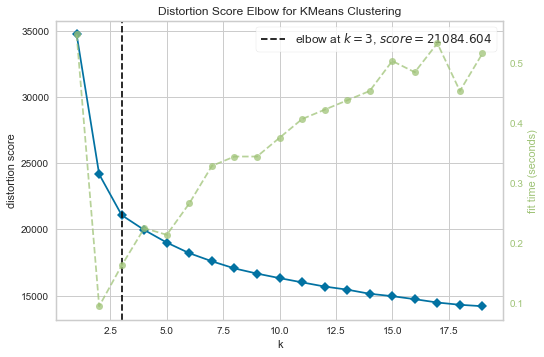

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [402]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))
visualizer.fit(scaled_features)      
visualizer.show()

In [403]:
for i in range(2,8):
    kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(scaled_features)
    print("Silhouette score for {} clusters k-means : {} ".format(i,metrics.silhouette_score(scaled_features,kmeans_labels, metric='euclidean').round(3)))

Silhouette score for 2 clusters k-means : 0.297 
Silhouette score for 3 clusters k-means : 0.23 
Silhouette score for 4 clusters k-means : 0.133 
Silhouette score for 5 clusters k-means : 0.123 
Silhouette score for 6 clusters k-means : 0.127 
Silhouette score for 7 clusters k-means : 0.116 


In [404]:
model = KMeans(n_clusters=3,init='k-means++').fit(scaled_features)
ypred=model.labels_
# ou ypred= model.predict(kmeans)df_norm
silhouette_score(scaled_features,ypred)

0.22968829586117118

In [319]:
#campaign_df.columns

In [405]:
campaign_df['Clusters']=list(ypred)
customers=pd.DataFrame(campaign_df['Clusters'].value_counts()).rename(columns={'Clusters':'Number of Customers'})
customers.T

,1,2,0
Number of Customers,1009,599,493


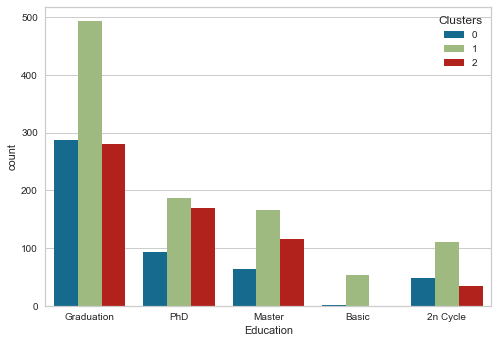

In [406]:
campaign_df['Education'].head()
ax = sns.countplot(x="Education", hue="Clusters", data=campaign_df)

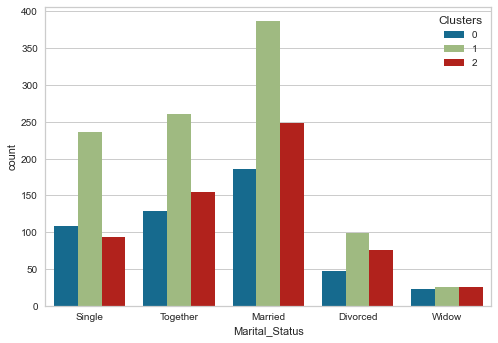

In [407]:
ax = sns.countplot(x="Marital_Status", hue="Clusters", data=campaign_df)


In [345]:
campaign_df.set_index('Clusters')
grouped=campaign_df.groupby(by='Clusters').mean().round(1)
#grouped.iloc[:,[0,1,6,8,9,11,12,16]]
#grouped.iloc[:,[0,1]]
grouped.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'Response', 'Age', 'Clusters_MiniBatch'],
      dtype='object')

In [408]:
campaign_df.Clusters

0       0
1       1
2       0
3       1
4       2
       ..
2235    0
2236    2
2237    2
2238    2
2239    1
Name: Clusters, Length: 2101, dtype: int64

In [346]:
grouped.shape

(3, 22)

ValueError: num must be 1 <= num <= 20, not 21

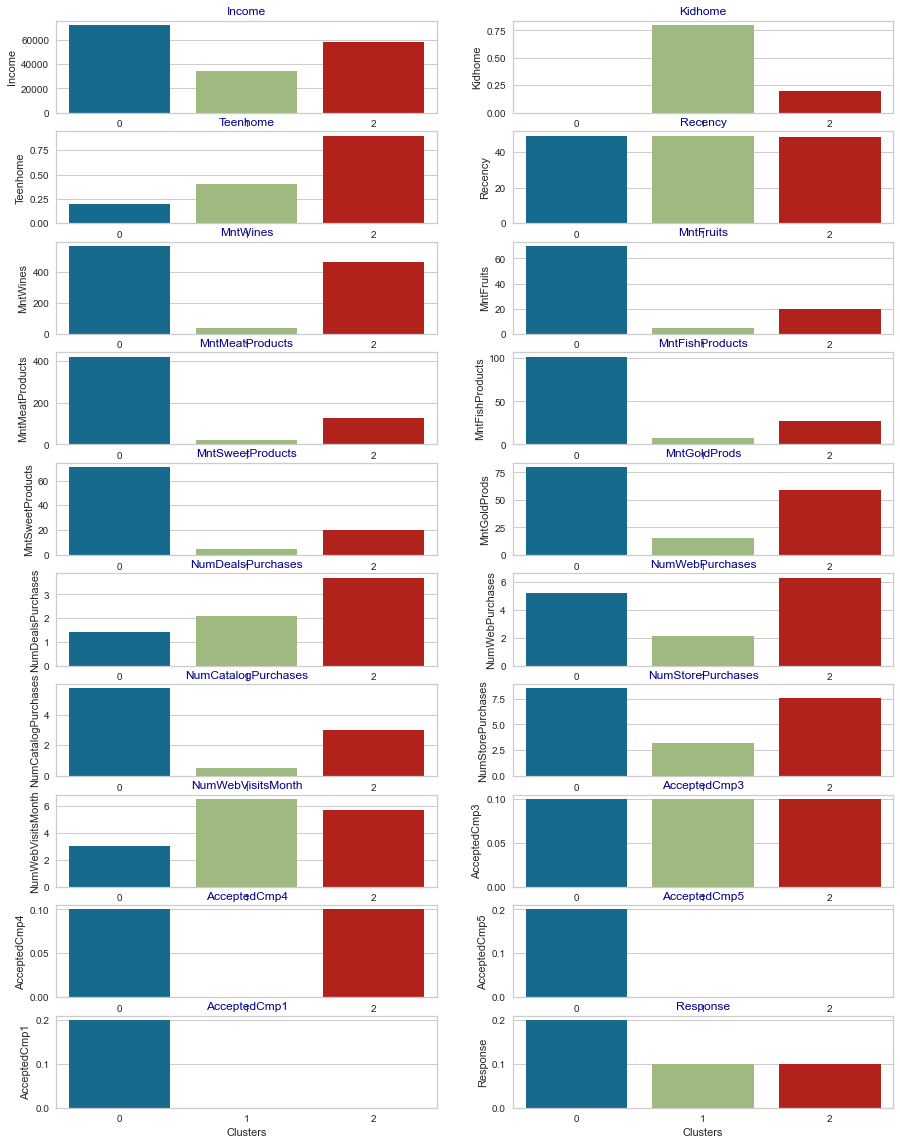

In [411]:
features=grouped.columns
plt.figure(figsize=(15,20))
for i,j in enumerate(features):
    plt.subplot(10,2,i+1)
    sns.barplot(grouped.index,grouped[j])
    plt.title(j,fontdict={'color':'darkblue'})
plt.tight_layout()
plt.show()

# MiniBatch K-Means

In [412]:
for i in range(2,6):
    minikm_labels = MiniBatchKMeans(n_clusters=i,init='random',batch_size=100000).fit_predict(scaled_features)
    print("Silhouette score for {} clusters MiniBatch k-means : {}".format(i,metrics.silhouette_score(scaled_features, minikm_labels, metric='euclidean').round(3)))

Silhouette score for 2 clusters MiniBatch k-means : 0.3
Silhouette score for 3 clusters MiniBatch k-means : 0.237
Silhouette score for 4 clusters MiniBatch k-means : 0.17
Silhouette score for 5 clusters MiniBatch k-means : 0.147


In [417]:
model2 = MiniBatchKMeans(n_clusters=4,init='k-means++').fit(scaled_features)
ypred2=model2.labels_
# ou ypred= model.predict(kmeans)
silhouette_score(scaled_features,ypred2).round(3)

0.18

In [418]:
campaign_df['Clusters_MiniBatch']=list(ypred2)
customers=pd.DataFrame(campaign_df['Clusters_MiniBatch'].value_counts()).rename(columns={'Clusters_MiniBatch':'Number of Customers'})
customers.T

,2,0,1,3
Number of Customers,936,495,342,328


In [419]:
campaign_df.set_index('Clusters_MiniBatch')
grouped=campaign_df.groupby(by='Clusters_MiniBatch').mean().round(1)
#grouped.iloc[:,[0,1,6,8,9,11,12,16]]
grouped.iloc[:,[0,1]]
grouped.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'Response', 'Age', 'Clusters'],
      dtype='object')

ValueError: num must be 1 <= num <= 20, not 21

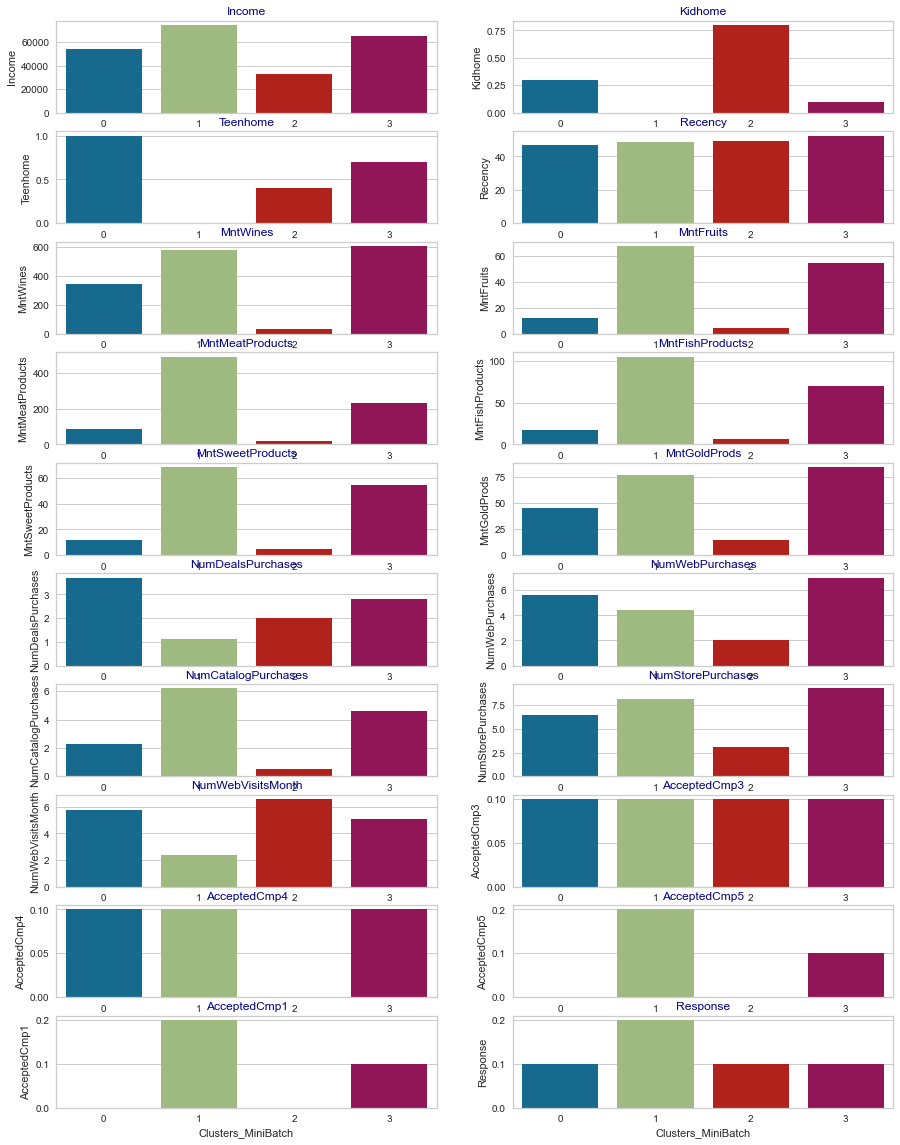

In [420]:
features=grouped.columns
plt.figure(figsize=(15,20))
for i,j in enumerate(features):
    plt.subplot(10,2,i+1)
    sns.barplot(grouped.index,grouped[j])
    plt.title(j,fontdict={'color':'darkblue'})
#plt.tight_layout()
plt.show()

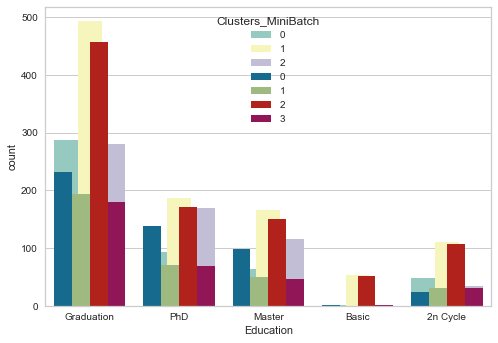

In [421]:
plt.subplot()
ax = sns.countplot(x="Education", hue="Clusters", data=campaign_df,palette="Set3")
ax = sns.countplot(x="Education", hue='Clusters_MiniBatch', data=campaign_df)

# PCA

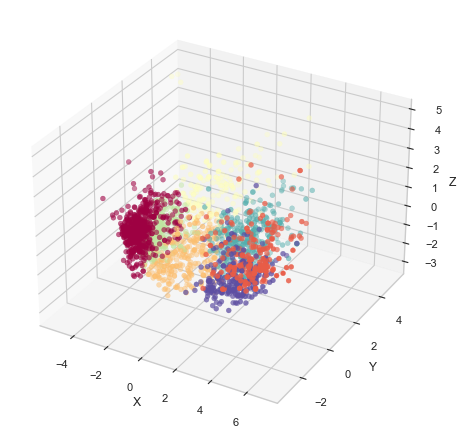

In [157]:
pca = PCA(n_components=3).fit_transform(scaled_features)
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=kmeans_labels,cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')

In [163]:
results=pd.DataFrame(columns=['Eps','Min_Samples','Number of Cluster','Silhouette Score'])
for i in range(1,12):
    for j in range(1,12):
        dbscan_cluster = DBSCAN(eps=i*0.2, min_samples=j)
        clusters=dbscan_cluster.fit_predict(scaled_features)
        if len(np.unique(clusters))>2:
            results=results.append({'Eps':i*0.2,
                        'Min_Samples':j,
                        'Number of Cluster':len(np.unique(clusters)),
                        'Silhouette Score':metrics.silhouette_score(scaled_features,clusters),
                        'Davies Bouldin Score':metrics.davies_bouldin_score(scaled_features,clusters)}, ignore_index=True)

In [164]:
results.sort_values('Silhouette Score',ascending=False)[:5]

,Eps,Min_Samples,Number of Cluster,Silhouette Score,Davies Bouldin Score
10,0.8,1.0,1793.0,0.170578,2.169633e-01
6,0.6,1.0,1878.0,0.169815,1.454611e-01
3,0.4,1.0,1918.0,0.165263,6.361050e-02
0,0.2,1.0,1927.0,0.162780,4.397580e-08
18,1.0,1.0,1626.0,0.160285,3.400178e-01


# df normalizer

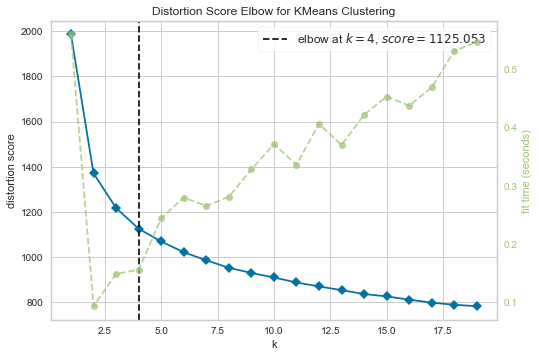

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [135]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))
visualizer.fit(df_norm)      
visualizer.show()

In [138]:
for i in range(3,10):
    kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(df_norm)
    print("Silhouette score for {} clusters k-means : {} ".format(i,metrics.silhouette_score(df_norm,kmeans_labels, metric='euclidean').round(3)))

Silhouette score for 3 clusters k-means : 0.235 
Silhouette score for 4 clusters k-means : 0.168 
Silhouette score for 5 clusters k-means : 0.159 
Silhouette score for 6 clusters k-means : 0.134 
Silhouette score for 7 clusters k-means : 0.143 
Silhouette score for 8 clusters k-means : 0.126 
Silhouette score for 9 clusters k-means : 0.118 


In [358]:
model_norm = KMeans(n_clusters=4,init='k-means++').fit(df_norm)
ypred_norm=model.labels_
# ou ypred= model.predict(kmeans)
silhouette_score(df_norm,ypred)

0.22930844849641438

ValueError: num must be 1 <= num <= 20, not 21

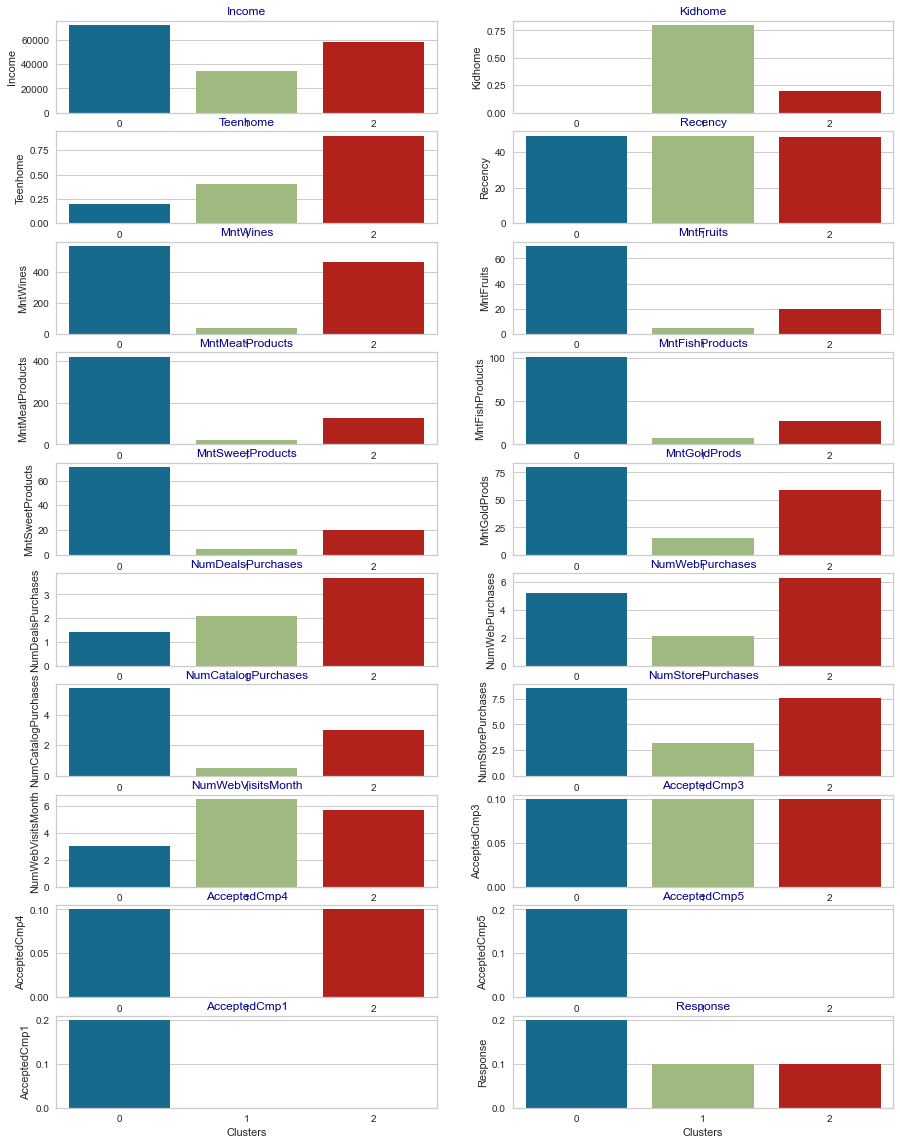

In [361]:
campaign_df.set_index('Clusters')
grouped=campaign_df.groupby(by='Clusters').mean().round(1)
grouped.iloc[:,[0,1]]
features=grouped.columns
plt.figure(figsize=(15,20))
for i,j in enumerate(features):
    plt.subplot(10,2,i+1)
    sns.barplot(grouped.index,grouped[j])
    plt.title(j,fontdict={'color':'darkblue'})
plt.tight_layout()
plt.show()

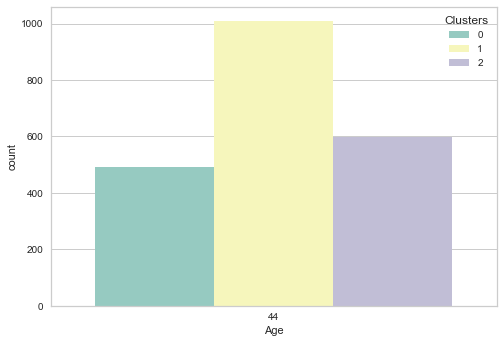

In [363]:
ax = sns.countplot(x="Age", hue="Clusters", data=campaign_df,palette="Set3")

# RFM

In [277]:
RFM_prep = campaign_df[['ID','Income','Recency','NumDealsPurchases','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']]


In [278]:
RFM_prep['Frequency'] = RFM_prep['NumWebPurchases']+RFM_prep['NumCatalogPurchases']+RFM_prep['NumStorePurchases']


In [279]:
RFM_prep['Monetary'] =  RFM_prep['MntFishProducts']+RFM_prep['MntFruits']+RFM_prep['MntWines']+RFM_prep['MntSweetProducts']+RFM_prep['MntGoldProds']+RFM_prep['MntMeatProducts']

In [280]:
RFM= RFM_prep[['ID','Recency','Frequency','Monetary']]
RFM.head()

,ID,Recency,Frequency,Monetary
0,5524,58,22,1617
1,2174,38,4,27
2,4141,26,20,776
3,6182,26,6,53
4,5324,94,14,422


In [281]:
print(RFM.min())


ID           0
Recency      0
Frequency    0
Monetary     5
dtype: int64


In [282]:
recency_labels = range(5, 0, -1)
frequency_labels = range(1, 6)

recency_groups = pd.qcut(RFM['Recency'], q=5, labels=recency_labels)
frequency_groups = pd.qcut(RFM['Frequency'], q=5, labels=frequency_labels)

RFM= RFM.assign(R=(recency_groups.values), F=frequency_groups.values)

monetary_labels = range(1, 6)
monetary_groups = pd.qcut(RFM['Monetary'], q=5, labels=monetary_labels)

RFM = RFM.assign(M=monetary_groups)

RFM.head()

,ID,Recency,Frequency,Monetary,R,F,M
0,5524,58,22,1617,3,5,5
1,2174,38,4,27,4,1,1
2,4141,26,20,776,4,4,4
3,6182,26,6,53,4,2,1
4,5324,94,14,422,1,3,3


In [283]:
RFM['RFM Score'] = RFM[['R','F','M']].sum(axis=1)
#RFM['RFM Score'] = np.dot(RFM['R'],100 )+np.dot(RFM['F'],10)+np.dot(RFM['M'],1)
RFM.head()


,ID,Recency,Frequency,Monetary,R,F,M,RFM Score
0,5524,58,22,1617,3,5,5,13
1,2174,38,4,27,4,1,1,6
2,4141,26,20,776,4,4,4,12
3,6182,26,6,53,4,2,1,7
4,5324,94,14,422,1,3,3,7


In [284]:
print(RFM['RFM Score'].max())
print(RFM['RFM Score'].min())

15
3


In [285]:
def rfm_level(df):
    if df['RFM Score'] >= 13:
        return 'Premium'
    elif (df['RFM Score'] >= 11) and (df['RFM Score'] <13) :
        return "Fidèle"
    elif (df['RFM Score'] >= 8) and (df['RFM Score'] <11) :
        return "dormeur"
    elif ((df['RFM Score'] ) >= 6) and  (df['RFM Score'] < 8 ):
        return "Lost"
    else:
        return "Touriste"

In [286]:
RFM['RFM_Level'] = RFM.apply(rfm_level, axis=1)
RFM.head()



,ID,Recency,Frequency,Monetary,R,F,M,RFM Score,RFM_Level
0,5524,58,22,1617,3,5,5,13,Premium
1,2174,38,4,27,4,1,1,6,Lost
2,4141,26,20,776,4,4,4,12,Fidèle
3,6182,26,6,53,4,2,1,7,Lost
4,5324,94,14,422,1,3,3,7,Lost


In [287]:

rfm_level_agg = RFM.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)

rfm_level_agg

Recency Frequency Monetary      
             mean      mean     mean count
RFM_Level                                 
Fidèle       46.6      18.6   1075.2   469
Lost         46.8       6.2    113.0   434
Premium      21.5      21.4   1343.4   319
Touriste     74.3       4.6     54.1   371
dormeur      51.6      12.6    548.8   647

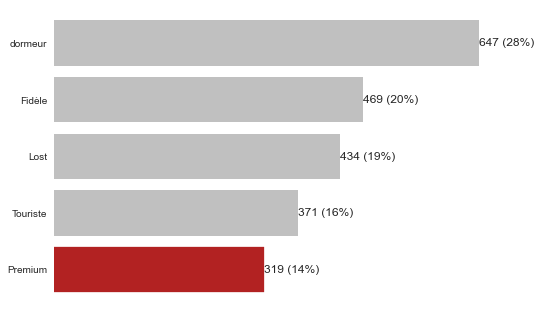

In [288]:
# count the number of customers in each segment
categ_counts = RFM['RFM_Level'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(categ_counts)),
              categ_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(categ_counts)))
ax.set_yticklabels(categ_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if categ_counts.index[i] in ['Premium']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/categ_counts.sum())),
                va='center',
                ha='left'
               )
plt.grid()
plt.show()


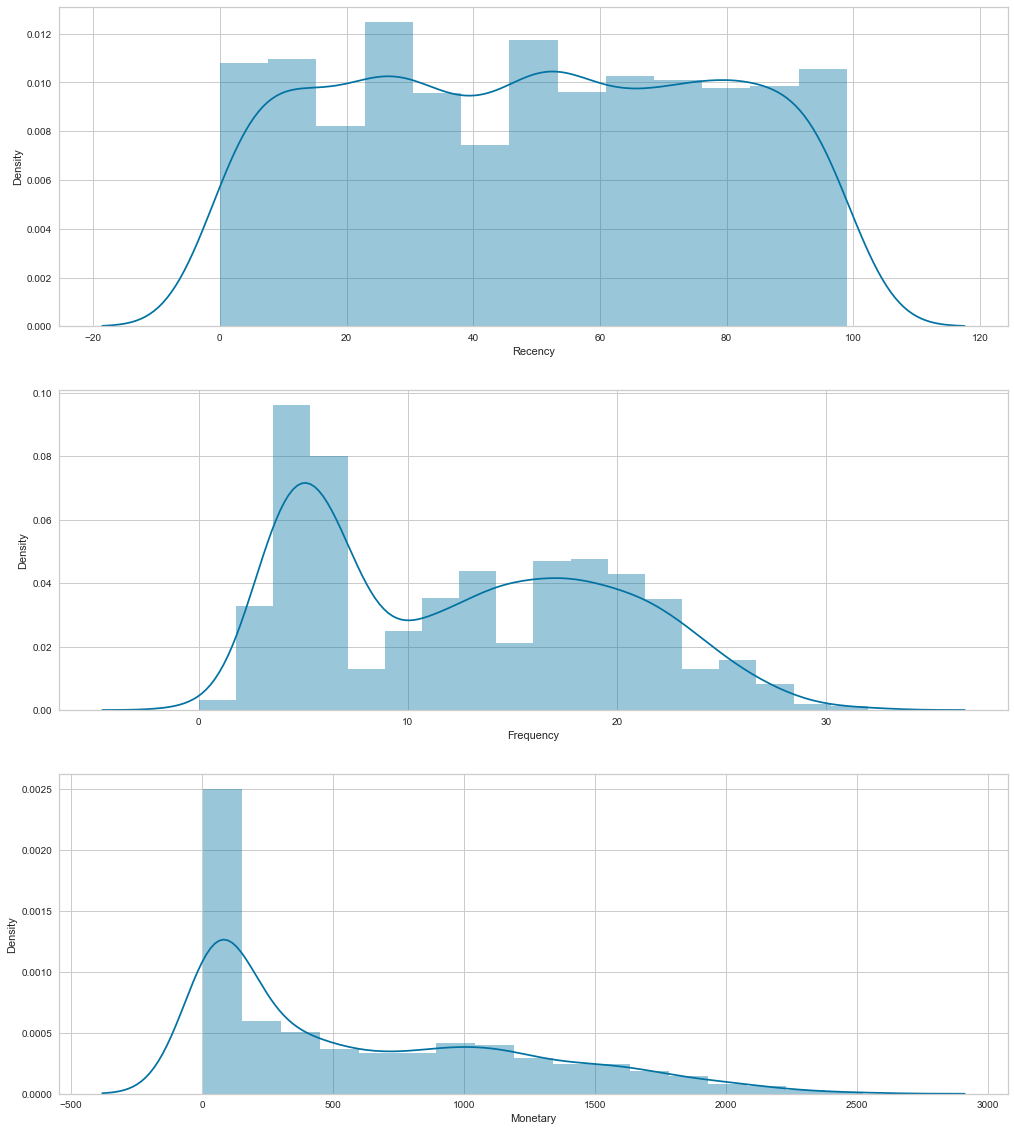

In [290]:
data_rfm = RFM[['Recency', 'Frequency', 'Monetary']]

plt.figure(figsize = (17,20))
plt.subplot(3, 1, 1); sns.distplot(data_rfm['Recency'])
plt.subplot(3, 1, 2); sns.distplot(data_rfm['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(data_rfm['Monetary'])
plt.show()

# Conlusions